Quete 2 scrapping chuck Norris

In [11]:
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [2]:
# scrapping des noms des fichiers
# url = "http://www.chucknorrisfacts.fr/facts/history"
url = "http://www.chucknorrisfacts.fr/facts/top/1"

# contournement d'éventuels protection anti-scrapping
navigator = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"

response = requests.get(url, headers={"User-Agent": navigator})
# response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# Trouver tous les liens sur la page
liens = soup.find_all("a")

1.Observe attentivement l'URL de la page 1. Essaye de passer à la page 2. Dans un notebook python, essaye de générer automatiquement les URL des 5 premières pages (avec une boucle par exemple ?)

In [5]:
# liste des urls pour chaque page
url = "http://www.chucknorrisfacts.fr/facts/top/"
liste_urls = []
liste_urls = [url + str(page) for page in range(1, 6)]
print(f"\nliste_urls :\n{liste_urls} \n")


liste_urls :
['http://www.chucknorrisfacts.fr/facts/top/1', 'http://www.chucknorrisfacts.fr/facts/top/2', 'http://www.chucknorrisfacts.fr/facts/top/3', 'http://www.chucknorrisfacts.fr/facts/top/4', 'http://www.chucknorrisfacts.fr/facts/top/5'] 



2.Utilise BeautifulSoup pour scraper les facts et les notes des 5 premières pages, grâce aux URL que tu as générées. (Nous pourrions faire les 100 ou 200 pages suivantes, mais ca risque d'entrainer une charge inutile pour ceux qui administrent ce serveur.) Le résultat doit être dans un dictionnaire.

In [37]:

# dictionnaire pour stocker les blagues et les notes
dico_blagues = {}
for url in liste_urls:
    # contournement d'éventuels protection anti-scrapping
    navigator = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"

    response = requests.get(url, headers={"User-Agent": navigator})
    # Supposons que 'html' est votre chaîne HTML
    soup = BeautifulSoup(response.text, "html.parser")
    # liste des blagues
    blagues = soup.find_all("div", class_="card-body bg-light rounded")

    # Trouve toutes les div des blagues pour obtenir les notes
    lignes_blagues = soup.find_all("div", class_="card")

    for index, card in enumerate(lignes_blagues):
        ligne_html_blague = card.find(
            "p", class_="card-text"
        )  # cherche paragraphes avec la classe "card-text"
        ligne_html_id_blague = card.find("a")  # cherche le premier lien
        ligne_html_note_blague = card.find(
            "span", id=lambda x: x and x.startswith("moyenne_")
        )  # cherche le premier élément <span> dont l’ID commence par 'moyenne_'
        ligne_html_blague = card.find(
            "p", class_="card-text"
        )  # cherche paragraphes avec la classe "card-text"

        # print(f"\ntexte_blague :\n{ligne_html_blague}\n ligne_html_id_blague :\n{ligne_html_id_blague}\n ligne_html_note_blague :\n{ligne_html_note_blague}\n")

        #  Si tous les elements existent et si le texte de la blague n'est pas vide :
        if ligne_html_blague.text != '' and ligne_html_blague and ligne_html_id_blague and ligne_html_note_blague:
            texte_blague = ligne_html_blague.text
            id_blague = ligne_html_id_blague.text.replace(
                "#", "")  # Enlever le symbole '#'
            note_blague = ligne_html_note_blague.text.replace("(", "").replace(
                "/10)", ""
            )  # Enlever les parenthèses et '/10'

            # Ajouter la blague et la note au dictionnaire
            dico_blagues[id_blague] = {
                "blague": texte_blague, "note": note_blague}
            # dico_blagues = {"blague": texte_blague, "note": note_blague}

print(dico_blagues)

{'231015': {'blague': "Les ennemis des amis de Chuck Norris sont ses amis. Et oui! Les ennemis de Chuck Norris n'existent plus.", 'note': '8.89'}, '145074': {'blague': "L'avenir se demande parfois ce que Chuck Norris lui réserve.", 'note': '8.43'}, '100129': {'blague': "Un jour Chuck Norris a eu un zero en latin, depuis c'est une langue morte.", 'note': '8.43'}, '124315': {'blague': 'Chuck Norris ne sait pas à quoi ressemble Nicolas Sarkozy,  en effet Chuck Norris ne baisse jamais les yeux.', 'note': '8.42'}, '100889': {'blague': "Chuck Norris n'a pas de père. On ne nique pas la mère de Chuck Norris.", 'note': '8.34'}, '35793': {'blague': "Chuck Norris ne ment pas, c'est la vérité qui se trompe.", 'note': '8.33'}, '100410': {'blague': 'Les samouraïs tuent des mouches avec leurs sabres...Chuck Norris, lui, tue des samouraïs avec des mouches', 'note': '8.32'}, '96377': {'blague': "Cherchez l'intrus : Un rouge-gorge, un pigeon, un moineau et Chuck Norris.Réponse : Un rouge-gorge, un pigeo

3. Crée un DataFrame contenant ces données, il doit donc posséder 2 colonnes et 100 lignes.

!! je n'ai que 99 blagues car j'ai supprimée celle qui était vide 

In [46]:
# Transformation du dictionnaire en DataFrame
df = pd.DataFrame(list(dico_blagues.items()), columns=["Blague", "Note"])
# print(f"\n shape:\n{df.shape} \n")
# print(df.head(20))
# print(f"\n 13éme blague :\n{df.iloc[12].values} \n")
# df = df.drop("Blague", axis=1)

# transofamtion du df pour n'avoir que 2 colonnes blague et note
df["Blague"] = df["Note"].apply(lambda x: x["blague"])
df["Note"] = df["Note"].apply(lambda x: x["note"])
print(df.head(20))

                                               Blague  Note
0   Les ennemis des amis de Chuck Norris sont ses ...  8.89
1   L'avenir se demande parfois ce que Chuck Norri...  8.43
2   Un jour Chuck Norris a eu un zero en latin, de...  8.43
3   Chuck Norris ne sait pas à quoi ressemble Nico...  8.42
4   Chuck Norris n'a pas de père. On ne nique pas ...  8.34
5   Chuck Norris ne ment pas, c'est la vérité qui ...  8.33
6   Les samouraïs tuent des mouches avec leurs sab...  8.32
7   Cherchez l'intrus : Un rouge-gorge, un pigeon,...  8.31
8        Chuck Norris peut ressusciter un angle mort.  8.31
9   Les ennemis de Chuck Norris lui disent souvent...  8.31
10  Chuck Norris est le seul homme à posséder une ...  8.29
11  Chuck Norris ne se masturbe jamais. Chuck Norr...  8.29
12  Chuck Norris n'est pas égal à lui-même, il est...  8.29
13  Un jour, les PowerRangers ont rencontré Chuck ...  8.29
14  Quand Chuck Norris lance une pièce, elle fait ...  8.28
15            Chuck Norris peut se souve

In [ ]:
df.shape

In [42]:
print(f"\n 13éme blague :\n{df.iloc[12].values} \n")


 13éme blague :
["Chuck Norris n'est pas égal à lui-même, il est meilleur." '8.29'] 



4.Crée une visualisation de la distribution des notes

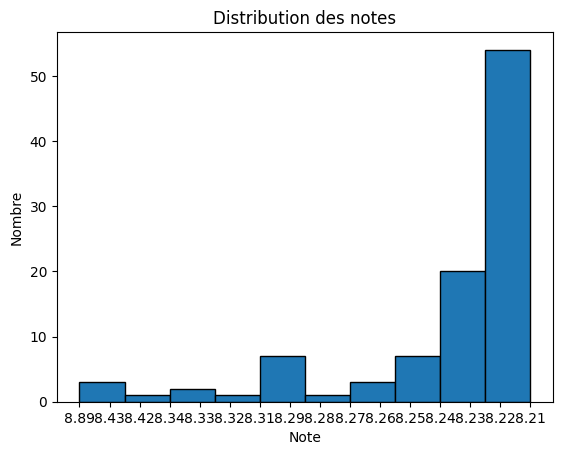

In [43]:
plt.hist(df["Note"], bins=10, edgecolor="black")
plt.xlabel("Note")
plt.ylabel("Nombre")
plt.title("Distribution des notes")
plt.show()

In [47]:
import plotly.offline as pyo
import plotly.graph_objs as go

# Créer un histogramme avec Plotly
data = [go.Histogram(x=df["Note"], nbinsx=10, orientation="v")]

# Créer un layout
layout = go.Layout(
    title="Distribution des notes", xaxis=dict(title="Nombre"), yaxis=dict(title="Note")
)

# Créer une figure et afficher le graphique
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig)

In [52]:
# df.describe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Blague  99 non-null     object
 1   Note    99 non-null     object
dtypes: object(2)
memory usage: 1.7+ KB


Structure HTML de la page

<div class="card">

        <div class="card-body bg-light rounded">
            <p class="card-text">Chuck Norris ne dort pas. Il attend.</p>
        </div>
    <div class="card-footer">
        <div class="row">
            <div class="col-md-8 card-footer-left smaller">
                <a href="/voir_fact/13">#13</a>
                <span id="moyenne_13">(7.33/10)</span>
            </div>
            <!-- <div class="col-md-4">
                <a href="#"><i class="bi-twitter smaller" style="color:#5C4202;"></i></a> 
                <a href="#"><i class="bi-facebook smaller" style="color:#5C4202;"></i></a>                
            </div> -->
            <div class="col-md-4 bold" id="vote_13">
                <a class="votelink bold smaller" data-factid="13" data-note=1 role="button">[+]</a> 
                <a class="votelink bold smaller" data-factid="13" data-note=2 role="button">[++]</a> 
                <a class="votelink bold smaller" data-factid="13" data-note=3 role="button">[+++]</a> 
                           
            </div>
            </div>
        </div>
    </div>